In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('titanic')

dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

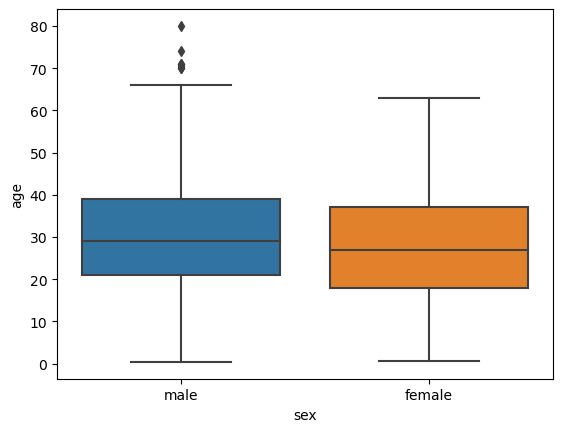

In [2]:
sns.boxplot(x='sex', y='age', data=dataset)

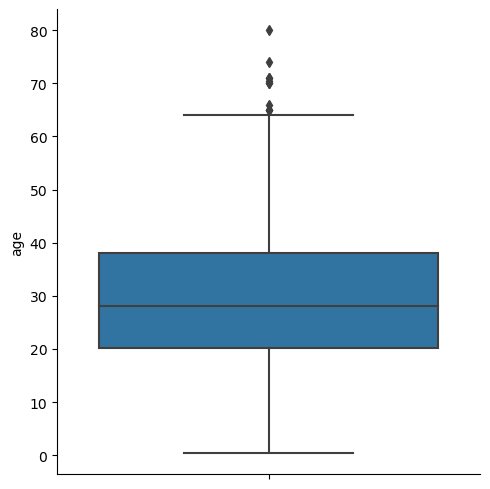

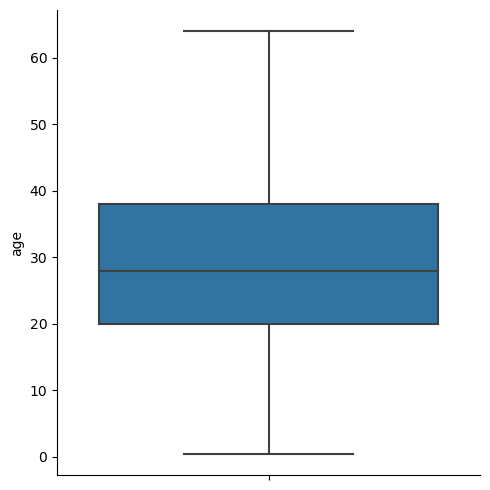

In [8]:
#From the above we conclude that sepal width cm has ouliers and need to be removed.

def outliers(df,feature): #Create a list of outlier indexes.
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    ls=df.index[(df[feature]<lower_bound)|(df[feature]>upper_bound)]
    return ls
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

#Form list of oulier indexes
index=[]
for feature in['age']:
    index.extend(outliers(dataset,feature))
#print(index)
df=remove(dataset,index)
sns.catplot(y='age',data=dataset,kind="box")
sns.catplot(y='age',data=df,kind="box")

In [ ]:
#we removed outliners

<Axes: xlabel='sex', ylabel='age'>

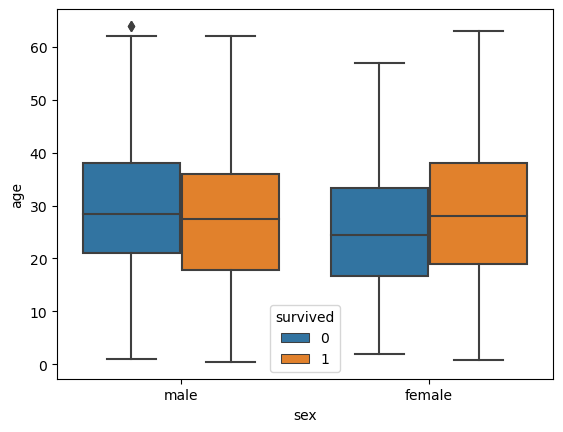

In [11]:
sns.boxplot(x='sex', y='age', data=df, hue="survived")